In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense, Activation , Conv2D , MaxPool2D , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
# CıFAR-10 a very popular dateset.
# 60k total data from 10 different classes.

cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train, X_test = X_train / 255.0  , X_test / 255.0 # Like manual scaling.
y_train, y_test = y_train.flatten(), y_test.flatten() 


print("Train Pictures Shape :", X_train.shape)
print("Train Label Shape:", y_train.shape)
print("Test Pictures Shape:", X_test.shape)

Train Pictures Shape : (50000, 32, 32, 3)
Train Label Shape: (50000,)
Test Pictures Shape: (10000, 32, 32, 3)


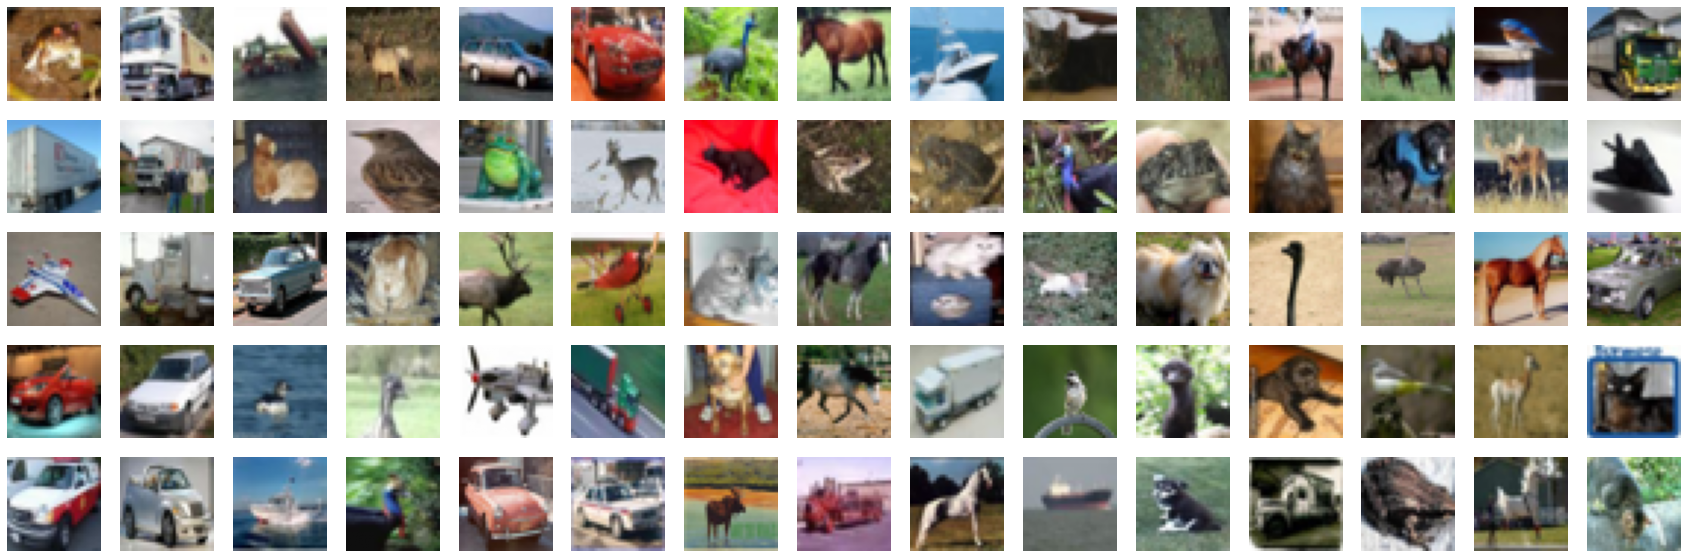

In [3]:
fig = plt.figure(figsize=(30,10))

for i in range(75):

    plt.subplot(5, 15, i+1)

    plt.imshow(X_train[i])
    
    plt.axis('off')

plt.show()

In [4]:
model = Sequential()

model.add(Conv2D(filters = 64 , kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters = 128 , kernel_size = (3,3) , activation = 'relu' ))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters = 256 , kernel_size = (3,3) , activation = 'relu' ))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10 , activation = 'softmax'))

In [5]:
# model = Sequential()

# model.add(Flatten())

# model.add(Dense(1024, activation = 'relu'))
# model.add(Dense(512, activation = 'relu'))
# model.add(Dense(256, activation = 'relu'))

# model.add(Dense(10 , activation = 'softmax'))

In [6]:
# ann_model2 = tf.keras.models.Sequential([

#   tf.keras.layers.Flatten(input_shape=(32, 32,3)),
#   tf.keras.layers.Dense(100, activation='relu'),
#   tf.keras.layers.Dense(50, activation='relu'),
#   tf.keras.layers.Dense(25, activation='relu'),
#   tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [7]:

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu', input_shape=(32, 32, 3)),
#   tf.keras.layers.MaxPooling2D(2, 2),

#   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),

#   tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),

#   tf.keras.layers.Flatten(),

#   tf.keras.layers.Dense(512, activation='relu'),

#   tf.keras.layers.Dropout(0.2),

#   tf.keras.layers.Dense(10, activation='softmax')
# ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 256)        0

In [9]:
opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt , loss = 'sparse_categorical_crossentropy' ,
              metrics = ['accuracy'])

In [10]:
model.fit(X_train , y_train , validation_split=0.1 , batch_size = 128 , epochs = 10 , verbose = 2)

Epoch 1/10
352/352 - 7s - loss: 1.7236 - accuracy: 0.3510 - val_loss: 1.3349 - val_accuracy: 0.5160 - 7s/epoch - 20ms/step
Epoch 2/10
352/352 - 3s - loss: 1.2499 - accuracy: 0.5556 - val_loss: 1.0688 - val_accuracy: 0.6224 - 3s/epoch - 9ms/step
Epoch 3/10
352/352 - 3s - loss: 1.0501 - accuracy: 0.6300 - val_loss: 0.9856 - val_accuracy: 0.6576 - 3s/epoch - 9ms/step
Epoch 4/10
352/352 - 3s - loss: 0.9026 - accuracy: 0.6864 - val_loss: 0.8767 - val_accuracy: 0.6966 - 3s/epoch - 9ms/step
Epoch 5/10
352/352 - 3s - loss: 0.7901 - accuracy: 0.7254 - val_loss: 0.8223 - val_accuracy: 0.7180 - 3s/epoch - 9ms/step
Epoch 6/10
352/352 - 3s - loss: 0.6955 - accuracy: 0.7612 - val_loss: 0.8101 - val_accuracy: 0.7246 - 3s/epoch - 9ms/step
Epoch 7/10
352/352 - 3s - loss: 0.6282 - accuracy: 0.7825 - val_loss: 0.7620 - val_accuracy: 0.7488 - 3s/epoch - 10ms/step
Epoch 8/10
352/352 - 3s - loss: 0.5514 - accuracy: 0.8098 - val_loss: 0.7817 - val_accuracy: 0.7428 - 3s/epoch - 10ms/step
Epoch 9/10
352/352 - 

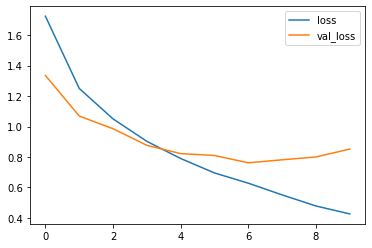

In [11]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend();

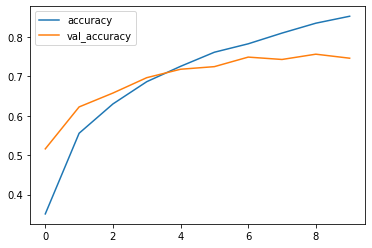

In [12]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend();

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8637 - accuracy: 0.7401


[0.8637486100196838, 0.7401000261306763]

In [14]:
y_predict = model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [15]:
label = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

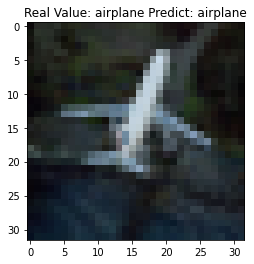

In [16]:
import random

i = random.randint(0, 9999)

plt.imshow(X_test[i])

l1 = label[y_test[i]]

l2 = label[y_predict[i]]

plt.title(f"Real Value: {l1} Predict: {l2}" );

In [ ]:
# Done